In [68]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml
import copy

In [69]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [121]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [71]:
a=traml.Stack()
a.library.search('ZnS')

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|     ID | SHELF   | BOOK           | PAGE     | DESCRIPTION                    |
|--------+---------+----------------+----------+--------------------------------|
| 101001 | main    | ZnSiAs2        | Boyd-o   | Boyd et al. 1972: n(o) 0.7-11. |
| 101002 | main    | ZnSiAs2        | Boyd-e   | Boyd et al. 1972: n(e) 0.7-11. |
| 114301 | main    | CdZnS          | Treharne | Treharne et al. 2014: n,k      |
| 114801 | main    | ZnS            | Debenham | Debenham 1984: Cubic ZnS; n 0. |
| 115701 | main    | ZnSe           | Connolly | Connolly et al. 1979: n 0.54-1 |
| 115702 | main    | ZnSe           | Marple   | Marple 1964: n 0.48-2.5 µm     |
| 314738 | glass   | SUMITA-molding | K-ZnSF8  | K-ZnSF8                        |


In [130]:
c = traml.Stack()
c.subsinf=True

peak = 0.6
delta = 0.1
mat1 = 105401 #MgF2
mat2 = 111407 #SiO2
#mat2 = 114801 #ZnS
#mat2 = 112003 #ZnO
#mat2 = 110902 #MgO
#mat1 = 110104 #Al2O3

R = []
n = [0]
it = []

c.add(mat1, 0)
stack_list=[]
stack_list.append(copy.deepcopy(c))
c.remove()



for i in range(0, 100):
    if i % 2 == 0:
        print 'even', i
        c.add(mat1,2, bnds=(2,50))
    else:
        c.add(mat2,2, bnds=(2,50))
        
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    stack_list.append(copy.deepcopy(c))
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    print '============================================================================================'

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     105401 | 0                | passive   |
even 0
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     105401 | 2                | passive   |
[1, 1]
[1]
0.0430184854878
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     105401 | 2.0000000149     | passive   |
|   2 |     111407 | 2                | passive   |
[1, 2]
[1, 2]
0.0429505461774
even 2
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+------

In [123]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

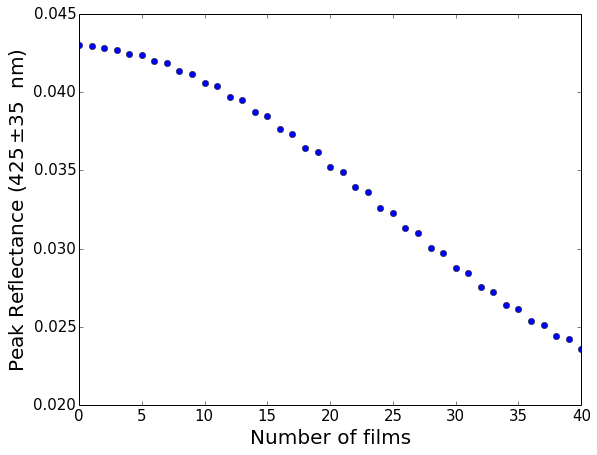

In [131]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)


ax.plot(R, 'o')
ax.set_xlim([0,40])
ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel(r'Peak Reflectance ($425\pm35$  nm)', fontsize=20)


(0, 1)

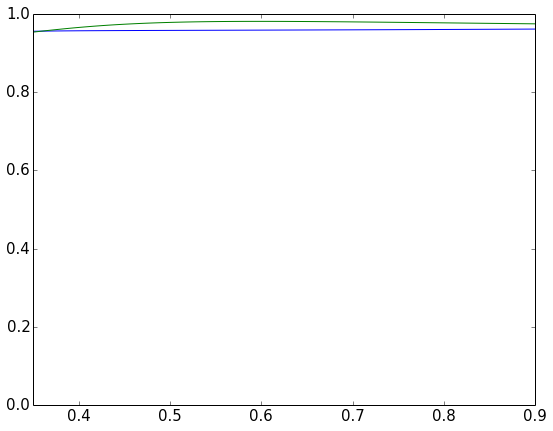

In [115]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

T1 = stack_list[0].get_T()
T2 = stack_list[16].get_T()
x = c.x

ax.plot(x, T1)
ax.plot(x, T2)
ax.set_xlim(0.35, 0.9)
ax.set_ylim(0,1)